In [1]:
from Bio import SeqIO

Nagy_Transcriptome = list(SeqIO.parse("Nagy-et-al./Nagy_Transcriptome.fasta", "fasta"))
ERX324290_Transcriptome = list(SeqIO.parse("ERX324290/ERX324290_trinity.fasta", "fasta"))

In [2]:
# Total reference transcript in transcriptome
print(len(Nagy_Transcriptome))
print(len(ERX324290_Transcriptome))

71545
195186


In [3]:
total_seq = 0
for record in ERX324290_Transcriptome:
    total_seq += len(record.seq)

print("The transcriptome sequences have a total lenth of {0} Mbp".format(total_seq / 10**6))

The transcriptome sequences have a total lenth of 164.180666 Mbp


In [45]:
for record in Nagy_Transcriptome:
    if record.id == "wcd-682":
        print(str(record.seq))

CTGCTTAAGCAGTGGTATCAACGCAGAGTACGCGGGGGATAACAGATTTAGATATCTCCCAACAAACCTTTTTTTTTCTTCAACTTGAAACTAAGCTCAGAGTCAGTGGCATATAATTCCAAACCTCTTAGATGAGGTTAGAATAGTAACAAAAAGAGAAGAGGATTAACAAGAAGGGGAGAAGTGTAGTTTCAAACTAATCTTCCCCTTCTTGATTGGTTTTTCCTTGTTCTGTTTATGTTCTTCTAGGCCAAAGAAAGTAACCAAAGTATATTCATAACAAGGGAAGCAAAGATGGATAGTAATTTAAGCAGAAGTATAAGTAGGAGTTTGAGTAGGTCAAGTTGGAAAATGGAAGAAGTGTTTGCTAGTGGAAGATATTCAAGAAGAACTTCTCAAGTTGATGAAGATGAAGAAGCACTTAAATGGGCTGCAATTGAGAAATTACCAACCTATGATAGGTTAAGAACAAGTATTATGCAAACATTTACTGAAGGTGATCAACCTCAACATGGAAACAGGATGCAACATAAAGAAGTTGATGTTAGGAAGCTTGATATGAATGATAGGCAACAAATTATTGACCAAATTTTCAAGGTTGCTGAAGAAGATAATGAAAAGTATCTCAGGAAATTCAGAAACAGAATTGACAAGGTTGGAATAAGACTTCCAACAGTAGAAGTGAGGTTTAAGAATTTGACTGTTGAAGCTGATTCCTTTGTTGGAAGCAGAGCTTTGCCAACACTACCAAATGTTGCATTAACCATTGTTGAATCACTTCTTGGCTTATGTGGAATTAGTACAACTAAGAGAACACAACTCACAATTCTTAAGAATGCTTCTGGCATTGTTAAACCATCGAGGATGGCCCTTTTACTAGGTCCACCTTCATCAGGGAAAACGACCCTTTTGTTGGCCTTGGCTGGAAAATTGGACTCTGAATTGAGGGTTAGAGGTGAAATTACTTACAATGGACACAAACTTAATGAGTTTGTACCAA

In [5]:
import re

transcripts_wORF = []
transcripts = {}

for record in ERX324290_Transcriptome:
    if "ATG" in record.seq:
        start_index = record.seq.find("ATG")
        start_sequence = str(record.seq[start_index:])
#         print(start_sequence)
        matches = re.finditer('ATG.+(TAA|TGA|TAG)', start_sequence)
        positions = [match.start(1) for match in matches]
        if positions:
            transcripts_wORF.append(transcripts_wORF)
            stop_index = min(positions)
            transcript = start_sequence[:stop_index + 3]
            transcripts[record.id] = transcript
        
print(len(transcripts_wORF))
# print(transcripts)

194337


In [6]:
transcript_lengths = []
for ID, transcript in transcripts.items():
    transcript_lengths.append(len(transcript))
print(min(transcript_lengths), 
      sum(transcript_lengths) / len(transcript_lengths), 
      max(transcript_lengths))

7 787.0831802487431 6161


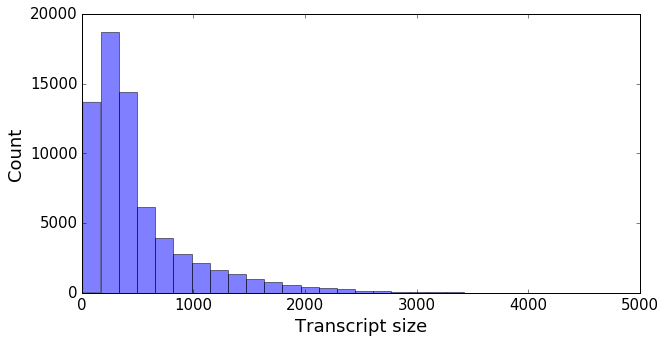

In [65]:
from matplotlib import pyplot as plt

# bt_200_1000 = 0
# total_sequence_sub = 0
# lengths = []
# for record in Transcriptome:
#     lengths.append(len(record.seq))
#     if len(record.seq) >= 200 and len(record.seq) <= 1000:
#         bt_200_1000 += 1
#         total_sequence_sub += len(record.seq)
    
# print(bt_200_1000, "{0}".format(total_sequence_sub / 10**6))

plt.figure(figsize = (10, 5))
plt.hist(transcript_lengths, bins = 30, alpha=0.5)
plt.xlabel("Transcript size", size = 18)
plt.ylabel("Count", size = 18)
plt.tick_params(labelsize=15)
plt.show()

39 0.018037


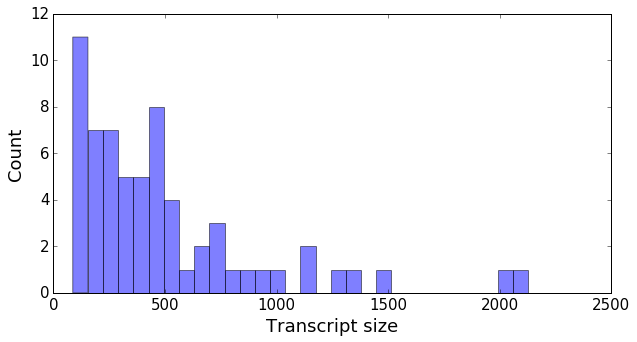

In [103]:
from matplotlib import pyplot as plt

bt_200_1000 = 0
total_sequence_sub = 0
lengths = []
for record in transcripts_wORF:
    lengths.append(len(record.seq))
    if len(record.seq) >= 200 and len(record.seq) <=1000:
        bt_200_1000 += 1
        total_sequence_sub += len(record.seq)
    
print(bt_200_1000, "{0}".format(total_sequence_sub / 10**6))
plt.figure(figsize = (10, 5))
plt.hist(lengths, bins = 30, alpha=0.5)
plt.xlabel("Transcript size", size = 18)
plt.ylabel("Count", size = 18)
plt.tick_params(labelsize=15)
plt.show()

In [12]:
def transcripts_with_SNP(Transcript_record_list, Number_of_SNPs):
    
    
    Transcripts = 0
    Length_Transcripts = []
    SNPs = 0
    for record in Transcript_record_list:
        if "SNVs" in record.description:
            if int(record.description.split("SNVs=")[-1]) >= Number_of_SNPs:
                Transcripts += 1
                Length_Transcripts.append(len(record.seq))
                SNPs += int(record.description.split("SNVs=")[-1])
                
    Transcripts_length = sum(Length_Transcripts)
    Mean_transcript_length = round(sum(Length_Transcripts) / len(Length_Transcripts))
    Number_100bp_probes = round(Transcripts_length / 100)
    
            
    print("There are {0} transcripts with at least {1} SNPs".format(Transcripts, Number_of_SNPs))
    print("These transcripts have a  total length of {0} Mbp".format(Transcripts_length / 1000000))
    print("The average length of transcripts with at least {0} SNPs is {1} bp".format(Number_of_SNPs, Mean_transcript_length))
    print("We would require {0} 100 bp probes to capture all of these transcripts".format(Number_100bp_probes))
    print("These sequences would contain approximately {0} SNPs".format(SNPs))

print("ALL SEQUENCES")
transcripts_with_SNP(Transcriptome, 0)
print("")
print("AT LEAST ONE SNP")
transcripts_with_SNP(Transcriptome, 1)
print("")
print("AT LEAST TEN SNPS")
transcripts_with_SNP(Transcriptome, 10)
print("")
print("AT LEAST 15 SNPS")
transcripts_with_SNP(Transcriptome, 15)

ALL SEQUENCES
There are 71544 transcripts with at least 0 SNPs
These transcripts have a  total length of 40.246746 Mbp
The average length of transcripts with at least 0 SNPs is 563 bp
We would require 402467 100 bp probes to capture all of these transcripts
These sequences would contain approximately 208854 SNPs

AT LEAST ONE SNP
There are 31715 transcripts with at least 1 SNPs
These transcripts have a  total length of 25.69057 Mbp
The average length of transcripts with at least 1 SNPs is 810 bp
We would require 256906 100 bp probes to capture all of these transcripts
These sequences would contain approximately 208854 SNPs

AT LEAST TEN SNPS
There are 6801 transcripts with at least 10 SNPs
These transcripts have a  total length of 9.603738 Mbp
The average length of transcripts with at least 10 SNPs is 1412 bp
We would require 96037 100 bp probes to capture all of these transcripts
These sequences would contain approximately 121169 SNPs

AT LEAST 15 SNPS
There are 3718 transcripts with 

In [2]:
import pandas as pd

colnames = ["qseqid", "sseqid", "pident", 
            "length", "mismatch", "gapopen",
            "qstart", "qend", "qlen", "sstart", 
            "send", "slen", "evalue", "bitscore", 
            "qcovs", "qcovhsp"]
selfBlast_RobMethod = pd.read_table("../../data-clean/010_self-blast/Nagy_transcriptome_selfBlast_RobMethod.csv", sep = ",")
selfBlast_JamesMethod_SameRem = pd.read_table("../../data-clean/010_self-blast/Nagy_transcriptome_selfBlast_JamesMethod_SameRem.csv", sep = ",")
selfBlast_JamesMethod_SameRem_DupDrop = pd.read_table("../../data-clean/010_self-blast/Nagy_transcriptome_selfBlast_JamesMethod_SameRem_DupDrop.csv", sep = ",")


In [3]:
print(len(selfBlast_RobMethod))
print(len(selfBlast_JamesMethod_SameRem))
print(len(selfBlast_JamesMethod_SameRem_DupDrop))

48661
61508
48661


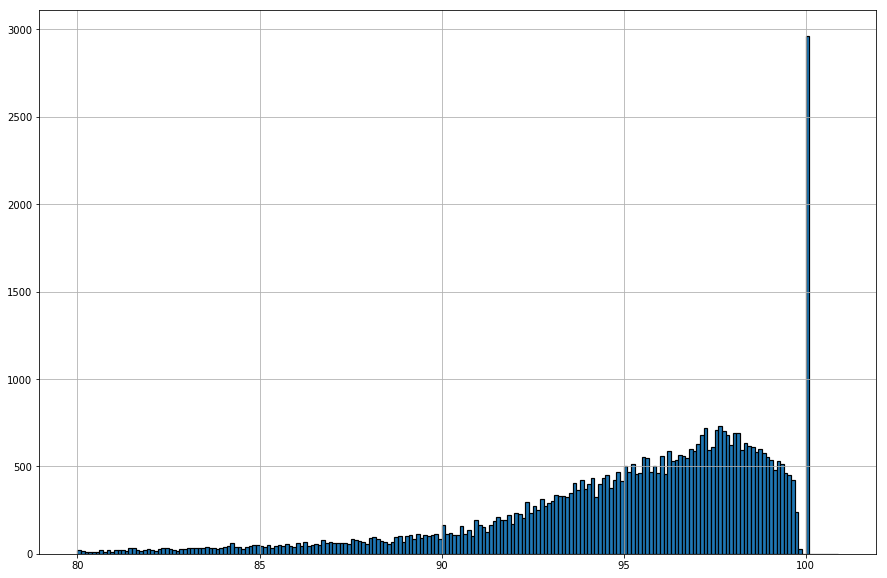

In [16]:
%matplotlib inline

b= [i/10.0 for i in list(range(800,1010))]
selfBlast_RobMethod.pident.hist(bins=b, edgecolor='black', linewidth=1.2, figsize = (15, 10))

In [9]:
b

[80.0,
 80.1,
 80.2,
 80.3,
 80.4,
 80.5,
 80.6,
 80.7,
 80.8,
 80.9,
 81.0,
 81.1,
 81.2,
 81.3,
 81.4,
 81.5,
 81.6,
 81.7,
 81.8,
 81.9,
 82.0,
 82.1,
 82.2,
 82.3,
 82.4,
 82.5,
 82.6,
 82.7,
 82.8,
 82.9,
 83.0,
 83.1,
 83.2,
 83.3,
 83.4,
 83.5,
 83.6,
 83.7,
 83.8,
 83.9,
 84.0,
 84.1,
 84.2,
 84.3,
 84.4,
 84.5,
 84.6,
 84.7,
 84.8,
 84.9,
 85.0,
 85.1,
 85.2,
 85.3,
 85.4,
 85.5,
 85.6,
 85.7,
 85.8,
 85.9,
 86.0,
 86.1,
 86.2,
 86.3,
 86.4,
 86.5,
 86.6,
 86.7,
 86.8,
 86.9,
 87.0,
 87.1,
 87.2,
 87.3,
 87.4,
 87.5,
 87.6,
 87.7,
 87.8,
 87.9,
 88.0,
 88.1,
 88.2,
 88.3,
 88.4,
 88.5,
 88.6,
 88.7,
 88.8,
 88.9,
 89.0,
 89.1,
 89.2,
 89.3,
 89.4,
 89.5,
 89.6,
 89.7,
 89.8,
 89.9,
 90.0,
 90.1,
 90.2,
 90.3,
 90.4,
 90.5,
 90.6,
 90.7,
 90.8,
 90.9,
 91.0,
 91.1,
 91.2,
 91.3,
 91.4,
 91.5,
 91.6,
 91.7,
 91.8,
 91.9,
 92.0,
 92.1,
 92.2,
 92.3,
 92.4,
 92.5,
 92.6,
 92.7,
 92.8,
 92.9,
 93.0,
 93.1,
 93.2,
 93.3,
 93.4,
 93.5,
 93.6,
 93.7,
 93.8,
 93.9,
 94.0,
 94.1,
 94.2,

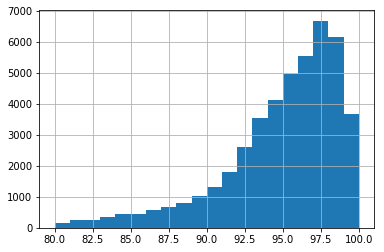

In [13]:
%matplotlib inline

b= [i/10 for i in list(range(800,1010))]
selfBlast_JamesMethod_SameRem_DupDrop.pident.hist(bins=b)

In [13]:
def check_qseqid_sseqid_paris(DataFrame1, DataFrame2):
    
    DataFrame1_pairs = [row['qseqid'] + '_' + row['sseqid'] for index, row in DataFrame1.iterrows()]
    DataFrame2_pairs = [row['qseqid'] + '_' + row['sseqid'] for index, row in DataFrame2.iterrows()]
    
    differences = list(set(DataFrame1_pairs) - set(DataFrame2_pairs))
    
    return(differences)

In [14]:
differences = check_qseqid_sseqid_paris(selfBlast_RobMethod, selfBlast_JamesMethod_SameRem_DupDrop)
len(differences)

31

In [30]:
qseqids = [x.split('_')[0] for x in differences]
sseqids = [x.split('_')[1] for x in differences]

['wcd-17053',
 'wcd-26060',
 'wcd-5029',
 'wcd-16881',
 'wcc-10422',
 'wcd-869',
 'wcd-5448',
 'wcs-6950',
 'wcd-11974',
 'wcd-25566',
 'wcd-37994',
 'wcd-27870',
 'wcd-39479',
 'wcd-29865',
 'wcd-27745',
 'wcc-17367',
 'wcd-13165',
 'wcd-10029',
 'wcd-3840',
 'wcd-41003',
 'wcc-33759',
 'wcd-2161',
 'wcs-17084',
 'wcd-19548',
 'wcd-43243',
 'wcd-37148',
 'wcc-10301',
 'wcd-34536',
 'wcc-37737',
 'wcd-26049',
 'wcs-29579']

In [39]:
for index, row in selfBlast_RobMethod.iterrows():
    
    if row['qseqid'] in qseqids:
        
        print(row.to_frame().T)
        print(selfBlast_JamesMethod_SameRem_DupDrop[(selfBlast_JamesMethod_SameRem_DupDrop['qseqid'] == row['qseqid'])])


      qseqid   sseqid  pident length mismatch gapopen qstart qend qlen sstart  \
75  wcd-3840  wcd-149  82.573    614       66      23    401  995  995   2397   

    send  slen     evalue bitscore qcovs qcovhsp  
75  1806  3031  1.07e-141      503    92      60  
        qseqid     sseqid  pident  length  mismatch  gapopen  qstart  qend  \
9915  wcd-3840  wcd-31898  84.405     513        70       10     465   974   

      qlen  sstart  send  slen         evalue  bitscore  qcovs  qcovhsp  
9915   995     506     1   512  1.800000e-139     496.0     51       51  
        qseqid   sseqid  pident length mismatch gapopen qstart qend qlen  \
4043  wcd-5448  wcd-141  73.942    591      110      20    213  764  772   

     sstart send  slen    evalue bitscore qcovs qcovhsp  
4043    854  269  1128  4.37e-50      198    72      72  
         qseqid     sseqid  pident  length  mismatch  gapopen  qstart  qend  \
44165  wcd-5448  wcc-34757  93.827      81         3        2     690   769   

  

          qseqid    sseqid  pident length mismatch gapopen qstart qend qlen  \
21059  wcd-39479  wcd-6004  88.144    194        7      11     85  277  277   

      sstart  send  slen    evalue bitscore qcovs qcovhsp  
21059   1890  1712  1890  4.09e-56      217    70      70  
          qseqid     sseqid  pident  length  mismatch  gapopen  qstart  qend  \
39675  wcd-39479  wcd-43676   100.0     115         0        0       1   115   

       qlen  sstart  send  slen        evalue  bitscore  qcovs  qcovhsp  
39675   277       2   116   337  5.290000e-55     213.0     42       42  
          qseqid    sseqid  pident length mismatch gapopen qstart qend qlen  \
21938  wcd-41003  wcc-8280  76.863    255       38      14      1  239  245   

      sstart  send  slen    evalue bitscore qcovs qcovhsp  
21938    801  1050  1428  2.24e-28      124    98      98  
          qseqid     sseqid  pident  length  mismatch  gapopen  qstart  qend  \
44783  wcd-41003  wcd-22422  85.526      76         7

In [44]:
selfBlast_AllBlast = pd.read_table("../../data-raw/010_self-blast/Nagy_transcriptome_SelfBlast.csv", sep = "\t", 
                                   names = colnames)

In [45]:
selfBlast_AllBlast

,qseqid,sseqid,pident,length,mismatch,gapopen,qstart,qend,qlen,sstart,send,slen,evalue,bitscore,qcovs,qcovhsp
0,wcd-8466,wcd-8466,100.000,999,0,0,1,999,999,1,999,999,0.000000e+00,1842.0,100,100
1,wcd-8466,wcd-1740,99.102,1002,4,5,1,999,999,1535,536,1613,0.000000e+00,1797.0,100,100
2,wcd-7834,wcd-7834,100.000,999,0,0,1,999,999,1,999,999,0.000000e+00,1845.0,100,100
3,wcd-7834,wcd-1941,97.708,829,14,3,98,925,999,30,854,854,0.000000e+00,1424.0,86,83
4,wcd-7834,wcd-1941,100.000,29,0,0,50,78,999,1,29,854,1.300000e-06,54.7,86,3
5,wcd-7404,wcd-7404,100.000,999,0,0,1,999,999,1,999,999,0.000000e+00,1845.0,100,100
6,wcd-7404,wcc-13574,97.262,840,5,12,1,835,999,827,1,948,0.000000e+00,1408.0,84,84
7,wcd-6537,wcd-6537,100.000,999,0,0,1,999,999,1,999,999,0.000000e+00,1842.0,100,100
8,wcd-6537,wcd-31388,97.794,272,0,3,731,999,999,1,269,349,5.080000e-130,464.0,27,27
9,wcd-42747,wcd-42747,100.000,999,0,0,1,999,999,1,999,999,0.000000e+00,1845.0,100,100


In [46]:
selfBlast_AllBlast[(selfBlast_AllBlast['qseqid'].isin(qseqids))]

,qseqid,sseqid,pident,length,mismatch,gapopen,qstart,qend,qlen,sstart,send,slen,evalue,bitscore,qcovs,qcovhsp
207,wcd-3840,wcd-3840,100.000,992,0,0,4,995,995,4,995,995,0.000000e+00,1832.0,99,99
208,wcd-3840,wcd-3840,100.000,42,0,0,954,995,995,995,954,995,7.710000e-14,78.7,99,4
209,wcd-3840,wcd-31898,84.405,513,70,10,465,974,995,506,1,512,1.800000e-139,496.0,51,51
10947,wcd-5448,wcd-5448,100.000,772,0,0,1,772,772,1,772,772,0.000000e+00,1426.0,100,100
10948,wcd-5448,wcd-5448,95.082,61,3,0,706,766,772,766,706,772,1.640000e-19,97.1,100,8
10949,wcd-5448,wcc-34757,93.827,81,3,2,690,769,772,301,380,463,9.720000e-27,121.0,10,10
10950,wcd-5448,wcc-34757,95.000,60,3,0,707,766,772,376,317,463,5.890000e-19,95.3,10,8
11295,wcd-19548,wcd-19548,100.000,767,0,0,1,767,767,1,767,767,0.000000e+00,1410.0,100,100
11296,wcd-19548,wcd-12,99.742,388,0,1,1,387,767,2454,2067,3101,0.000000e+00,710.0,94,50
11297,wcd-19548,wcd-12,96.463,311,9,2,378,687,767,1974,1665,3101,1.360000e-144,512.0,94,40


In [ ]:
used = []
selfBlast_old_filtered = pd.DataFrame(columns = colnames)

for index, row in selfBlast_old.iterrows():
    if row['qseqid'] == row['sseqid']:
        continue
    elif row['qseqid'] not in used:
        selfBlast_old_filtered.loc[index] = row
        used.append(row['qseqid'])
    else:
        continue
selfBlast_old_filtered

In [34]:
filtered.to_csv("../../data-clean/010_self-blast/Nagy_transcriptome_selfBlast_JamesMethod_SameRem_DupDrop.csv", 
                              header = colnames, index = False)

In [32]:
def filter_selfBlast(dataFrame):
    
    filtered = dataFrame[(dataFrame['qseqid'] != dataFrame['sseqid'])]
    filtered = filtered.sort_values('length', ascending=False).drop_duplicates(['qseqid'])
    
    return(filtered)

# selfBlast_Filtered = selfBlast[(selfBlast['qseqid'] != selfBlast['sseqid']) & 
#                                (selfBlast['length'] > 100) & 
#                                (selfBlast['pident'] >= 98.00) &
#                                (selfBlast['qcovs'] >= 80.00)]

In [15]:
def multiplex(coverage_perInd, sequence_length_perInd, sequencer_output):
    
    sequence_length_perInd = sequence_length_perInd * 10**6 # Convert base pairs
    sequencer_output = sequencer_output * 10**9 # Conver to base pairs
    
    total_sequence_length = coverage_perInd * sequence_length_perInd
    
    indMultiplexed = sequencer_output / total_sequence_length
    
    print(indMultiplexed)
    
coverage_perInd = 30
sequence_length_perInd = 6 # Mega base pairs
sequencer_output = 100  # Giga base pairs

multiplex(coverage_perInd, sequence_length_perInd, sequencer_output)

555.5555555555555
